# Interview challenge - Junior Data Scientist
This programming exercise is developed by Nicolás Pérez de Olaguer on Thursday 04.03.2021.

Importing required libraries, for installing, please run: `pip install -r requirements.txt` on the given file to make sure all dependencies are matched.

In [311]:
import os
import typing
import logging
import math
import csv

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
pd.options.mode.chained_assignment = None 

Use ggplot as style for plotting

In [296]:
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
sns.set_theme(style="ticks", color_codes=True)

Define function to load the data in using Pandas library.

In [297]:
def read_csv_data(filename: str, delimiter: str) -> pd.DataFrame:
    """
    Function that loads a given .csv file using Pandas library and return it in a DataFrame object.
    :param filename: String containing the filename.
    :param delimiter: String of the csv delimiter.
    :return: Pandas DataFrame
    """
    df = pd.read_csv(filename, sep=delimiter)

    return df

## Load and familiarize with the dataset. Are there any issues, that could disturb further analyses?

Here, I use the created function to load the data as a Pandas DataFrame. To analyse the data, I will check the range of the data, the mean and standard deviation. Also, I will inspect into missing or repeated measures.

In [298]:
current_path = os.getcwd()

# Defining the filename
filename = 'challenge_juniorDS_feb2021.csv'

file_path = os.path.join(current_path, filename)

# Loading data from the given file
raw_data = read_csv_data(file_path, ';')

In [299]:
# See the first ten rows of the data for familarizing
raw_data.head(n=10)

,nir_1366,nir_1378,nir_1390,nir_1402,nir_1414,nir_1426,nir_1438,nir_1450,nir_1462,nir_1474,...,nir_2518,nir_2530,device_id,label1,label2,field_id,position_id,spot_id,mID,date
0,0.363926,0.350865,0.330383,0.297856,0.274306,0.267428,0.263071,0.262623,0.260094,0.264123,...,0.151945,0.151691,6,good,issue_1,field_6,1,1,514234,2020-03-04
1,0.352420,0.341933,0.320079,0.289949,0.261719,0.256643,0.253282,0.252888,0.250116,0.255253,...,0.145378,0.145107,6,good,issue_1,field_6,1,1,514236,2020-03-04
2,0.352814,0.345784,0.322058,0.291212,0.264951,0.256647,0.254134,0.252345,0.252983,0.256853,...,0.144151,0.143970,6,good,issue_1,field_6,1,1,514238,2020-03-04
3,0.382781,0.371203,0.356452,0.330397,0.306710,0.308089,0.306187,0.305090,0.303479,0.308517,...,0.200565,0.200643,5,bad,issue_4,field_6,2,1,514248,2020-03-04
4,0.372411,0.366229,0.347437,0.322621,0.299037,0.298630,0.293724,0.296257,0.295536,0.297862,...,0.185979,0.186190,5,bad,issue_4,field_6,2,1,514251,2020-03-04
5,0.377337,0.371954,0.350394,0.325345,0.303041,0.300181,0.297893,0.298587,0.300049,0.300989,...,0.185943,0.185980,5,bad,issue_4,field_6,2,1,514253,2020-03-04
6,0.656370,0.651822,0.634788,0.611317,0.588405,0.585875,0.584247,0.590157,0.590410,0.593797,...,0.351301,0.349905,6,bad,issue_4,field_6,1,2,514275,2020-03-04
7,0.644057,0.637080,0.621609,0.597203,0.572212,0.572283,0.569114,0.575224,0.575041,0.581916,...,0.335294,0.333695,6,bad,issue_4,field_6,1,2,514278,2020-03-04
8,0.632936,0.630511,0.611989,0.587365,0.564702,0.561515,0.561180,0.566006,0.565514,0.572254,...,0.324276,0.322656,6,bad,issue_4,field_6,1,2,514281,2020-03-04
9,0.416926,0.410954,0.387006,0.347756,0.312454,0.310442,0.305471,0.306490,0.305229,0.311784,...,0.182683,0.183629,5,good,issue_1,field_6,2,2,514287,2020-03-04


In [300]:
# Divide the data frame in sensor data and descriptive data(device id, labels, etc.)

sensor_data = raw_data[raw_data.columns[:-8]]

misc_cols = [ 'device_id','label1', 'label2', 'field_id', 'position_id', 'spot_id', 'mID', 'date']
misc_data = raw_data[misc_cols]

# Use describe function on sensor data to see numerical insights.
sensor_data.describe()

,nir_1366,nir_1378,nir_1390,nir_1402,nir_1414,nir_1426,nir_1438,nir_1450,nir_1462,nir_1474,...,nir_2422,nir_2434,nir_2446,nir_2458,nir_2470,nir_2482,nir_2494,nir_2506,nir_2518,nir_2530
count,3255.000000,3255.000000,3255.000000,3255.000000,3255.000000,3255.000000,3255.000000,3255.000000,3255.000000,3255.000000,...,3255.000000,3245.000000,3255.000000,3255.000000,3255.000000,3255.000000,3255.000000,3255.000000,3255.000000,3255.000000
mean,0.461986,0.456047,0.436573,0.405898,0.379867,0.369946,0.363700,0.361569,0.362057,0.368423,...,0.304736,0.294088,0.283271,0.273448,0.264693,0.257002,0.250531,0.245930,0.243934,0.244693
std,0.123436,0.122259,0.120040,0.117140,0.114735,0.114571,0.114273,0.115337,0.115473,0.116695,...,0.110678,0.108497,0.106025,0.103926,0.102130,0.100471,0.098712,0.097063,0.096025,0.095889
min,0.158427,0.156436,0.150367,0.139220,0.132487,0.128851,0.129232,0.127951,0.127853,0.129593,...,0.117236,0.111219,0.105288,0.099801,0.094871,0.090822,0.087974,0.086153,0.085429,0.085229
25%,0.372021,0.366552,0.347579,0.318338,0.293605,0.283921,0.277840,0.274829,0.275479,0.281025,...,0.226552,0.218064,0.209222,0.201085,0.193896,0.187233,0.182171,0.178855,0.177905,0.179132
50%,0.439210,0.432522,0.409779,0.377227,0.349076,0.339321,0.333369,0.330014,0.330375,0.335919,...,0.272137,0.262160,0.252087,0.243310,0.235329,0.228084,0.222199,0.218154,0.216262,0.217378
75%,0.528149,0.523614,0.502759,0.471960,0.443830,0.434771,0.427982,0.426029,0.426977,0.433981,...,0.362674,0.350028,0.336672,0.324423,0.313814,0.304354,0.296260,0.291058,0.288911,0.289793
max,0.967581,0.953759,0.920279,0.882653,0.836247,0.821138,0.815676,0.815602,0.815586,0.825605,...,0.821080,0.809547,0.798205,0.788065,0.779368,0.771717,0.764063,0.757738,0.754751,0.755718


Also, an intuitive way to see how the data is distributed is too look at a colorscale plot. Since we have a lot of data, this will give coarse information such as: possible correlations and potential problems.

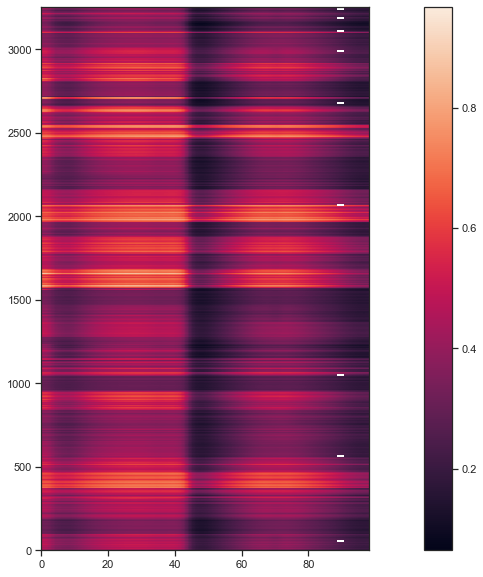

In [301]:
plt.imshow(sensor_data, origin = 'upper', extent = [0, 98, 0, 3255], aspect = 0.05)
plt.colorbar()

This plot already tell us that there might be correlation among rows (measurements) since we see horizontal color patterns. The visible vertical patterns also show correlation among wavelenght sensor data. Also, we see that there is missing data in one specific column. 

Moreover, the data is bounded to the [0,1] range, thus, normalized. Depending on which model do we want to build later on, it would be useful to check standard deviation of all the measures and see if they are similar. 

Now we look int the other non-numerical data.

In [302]:
# Change devide_id, position_id, spot_id and m_id to categorical data
to_categorical = [ 'device_id', 'field_id', 'position_id', 'spot_id', 'mID']

misc_data[to_categorical] = misc_data[to_categorical].astype('category')
raw_data[to_categorical] = raw_data[to_categorical].astype('category')
# data insights
misc_data.describe()



,device_id,label1,label2,field_id,position_id,spot_id,mID,date
count,3255,3233,3233,3255,3255,3255,3255,3255
unique,10,2,6,35,5,3,3255,30
top,6,good,issue_1,field_14,1,1,0,2020-08-14
freq,528,2911,2541,114,692,1150,1,306


Here we can already see the possible value representation of the non-numerical. We already see that the label fields have missing values. Let's investigate this... 

In [83]:
# Check for unique values
misc_data.apply(lambda col: col.nunique(), axis=0)

device_id        10
label1            2
label2            6
field_id         35
position_id       5
spot_id           3
mID            3255
date             30
dtype: int64

I also make sure that the data has no repeated values by checking its unique values. There are no repeated measurements since all the measurements IDs (mID) are unique and matching the number of data rows. 

In [89]:
# Look for missing values
counts = raw_data.isna().sum(axis=0)
counts[counts > 0]

nir_2434    10
label1      22
label2      22
dtype: int64

There is missing data in the sensor measurements as well as in the given labels. Specifically, there are a total of 10 missing nir_2434 sensor values and 22 missing label1 and label2. 

As imputation for the numerical data, I will replace the missing values with the mean over measurement, i.e., row. Before the data analysis, the row data seems to be correlated as it is dependent from the location and field. Thus, replacing by the mean of every measurment will have the least impact on the data.

In [268]:
# Imputating the missing values for roe means
sensor_data = sensor_data.apply(lambda row: row.fillna(row.mean()), axis=1)

Let's now look into the distribution of the data with respect to the given labels. I will plot randomly slected sensor data across measurements to see the predictive power of the sensor data (columns). 

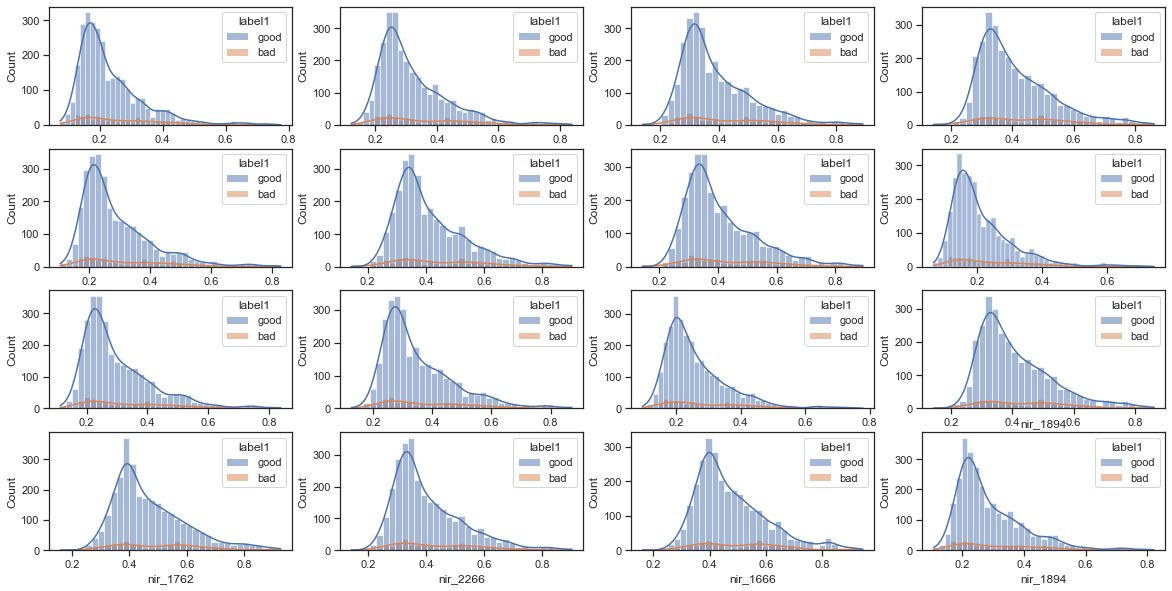

In [470]:
# For Label 1
f, axes = plt.subplots(4, 4)

for col, ax in zip(np.random.choice([c for c in sensor_data], size=16), axes.flatten()):
    sns.histplot(raw_data, x=col, hue='label1', kde=True, ax=ax)
    plt.title(col)
plt.show()

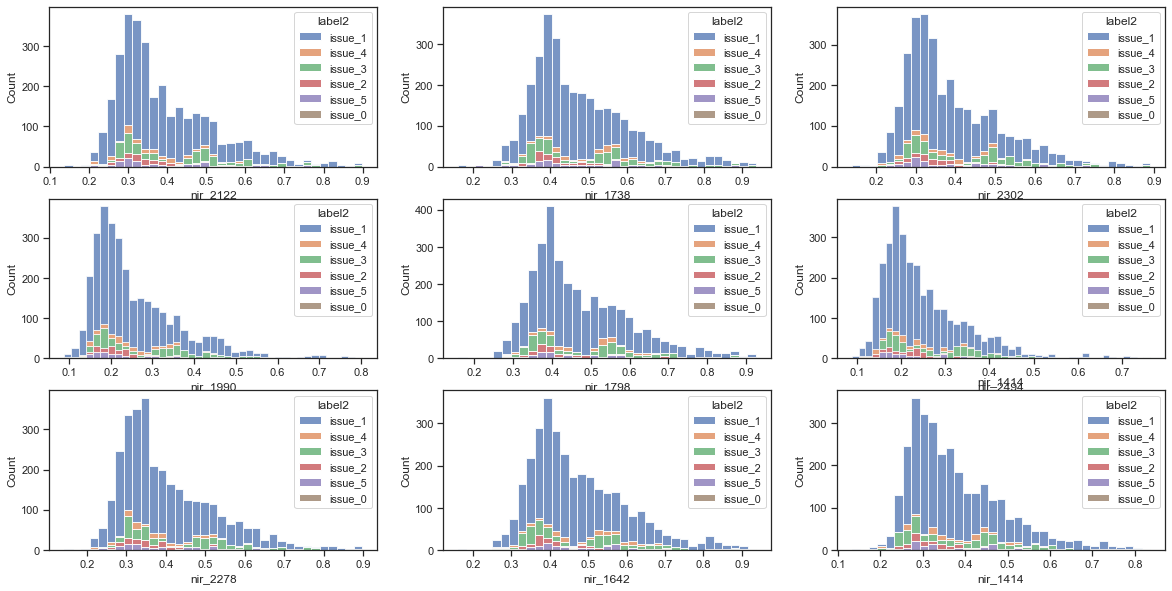

In [336]:
# For label 2
f1, axes = plt.subplots(3, 3)

for col, ax in zip(np.random.choice([c for c in sensor_data], size=9), axes.flatten()):
    sns.histplot(raw_data, x=col, hue='label2', multiple="stack", ax=ax)
    plt.title(col)
plt.show()

The distribution of the measurement data appears to be similar for different sensors. This might tell us that the sensor data itself does not have much predictive power for the labels. Therefore, we can do two things:
1. Reduce the dimensionality of the data per measurement across sensors, e.g. compute the mean across sensors per measurement.
2. Transofrm the data in a way that every single measurement has labels assigned to them. This will increase the number of rows of our data and we won't loose any information (compared to the mean).  

Finally, I will analyse the distribution of the actual near infrared (NIR) wavelenghts. This might be useful to get insights on the actual meaning of the data and if it has a uniform distribution. 

(0    1366
dtype: int64, 0    2530
dtype: int64)


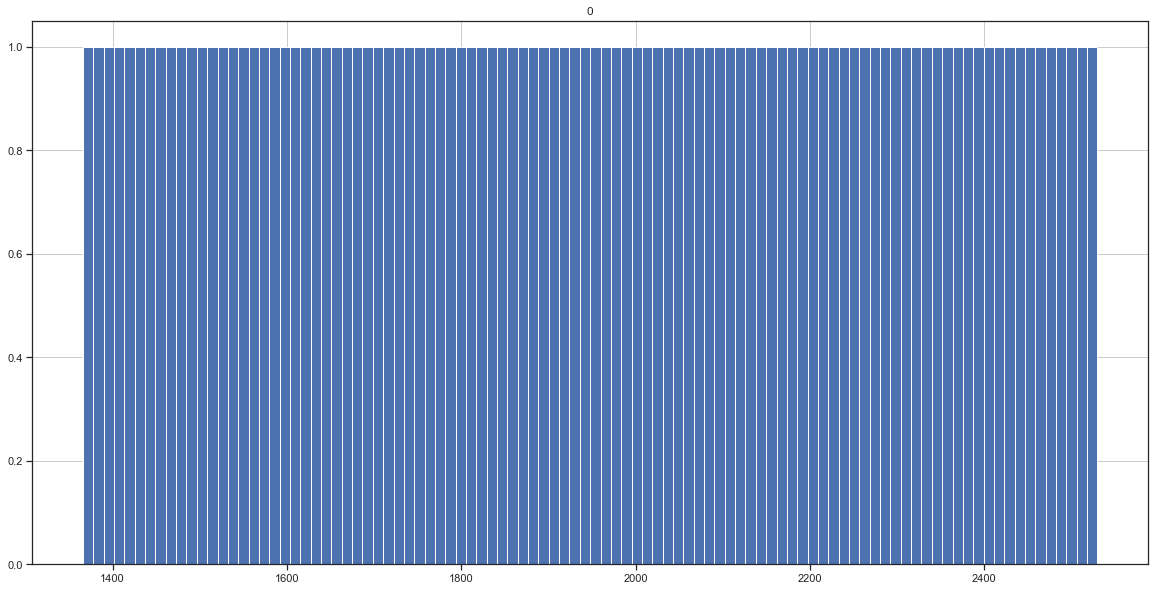

In [307]:
# Analyzing the distribution of the measured wavelenghts

# Get the column values and remove the nir string 
w_lenghts = list(sensor_data.columns.values)
w_lenghts = pd.DataFrame([int(wlen.replace('nir_','')) for wlen in w_lenghts])

# Plot histogram to see distribution 
w_lenghts.hist(bins=len(w_lenghts))
print((w_lenghts.min(), w_lenghts.max()))

We can see that there is a uniform distribution of the wavelenghts across the 1366 to 2530 nm. Therefore, there is no need to modify the data.

## Evaluation of the variation of spectral data per field.

First, let's analyze how many measurement per field we have. 

<AxesSubplot:>

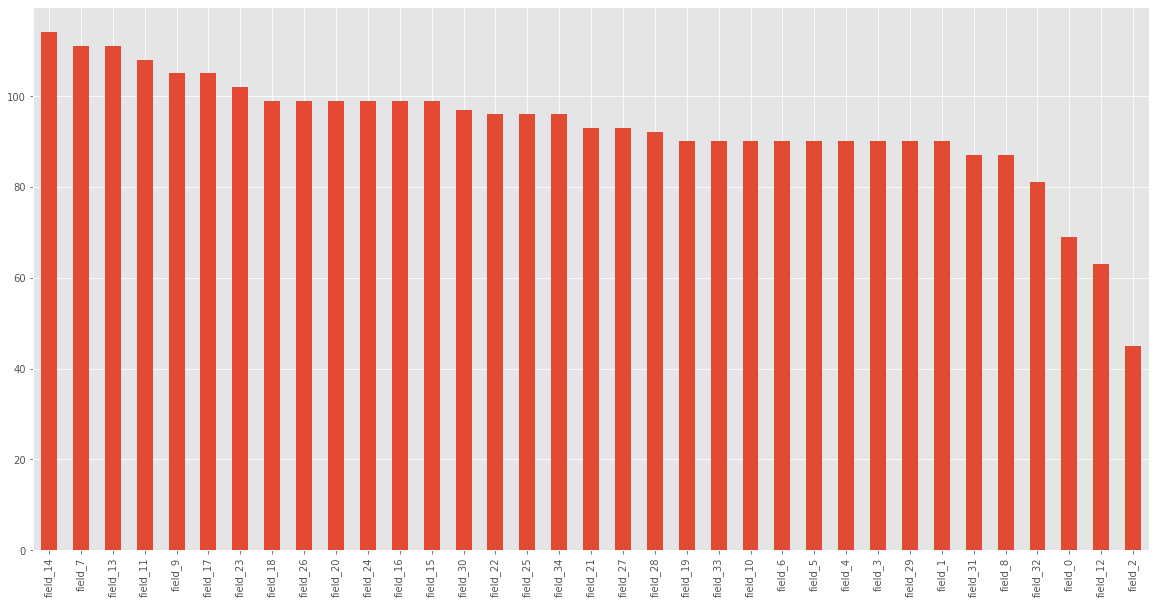

In [93]:
# How many measurements per field
raw_data['field_id'].value_counts().plot(kind='bar')

We see that there are uniformly distributed number of measurements per field at around 90 measurements. Also, we see that fields 0, 2 and 12 have significant less number of measurements. 

<AxesSubplot:>

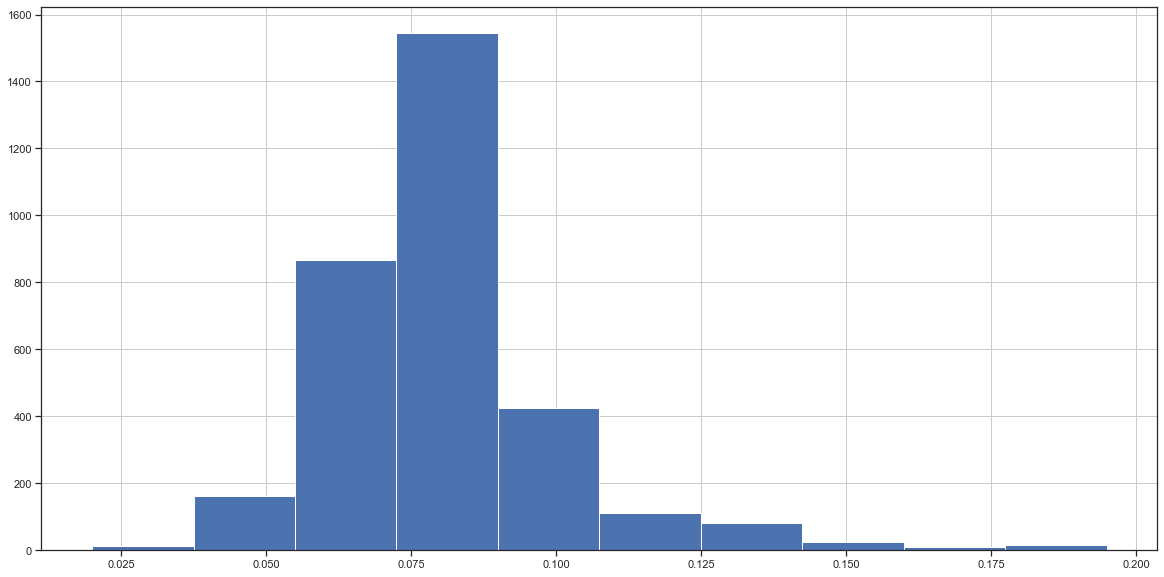

In [101]:
sensor_data = raw_data[raw_data.columns[:-8]]
sensor_data.apply(np.std, axis=1).hist()

In [112]:
sensor_data.apply(np.std, axis=0)

nir_1366    0.123417
nir_1378    0.122240
nir_1390    0.120022
nir_1402    0.117122
nir_1414    0.114717
              ...   
nir_2482    0.100456
nir_2494    0.098696
nir_2506    0.097048
nir_2518    0.096010
nir_2530    0.095875
Length: 98, dtype: float64

<AxesSubplot:>

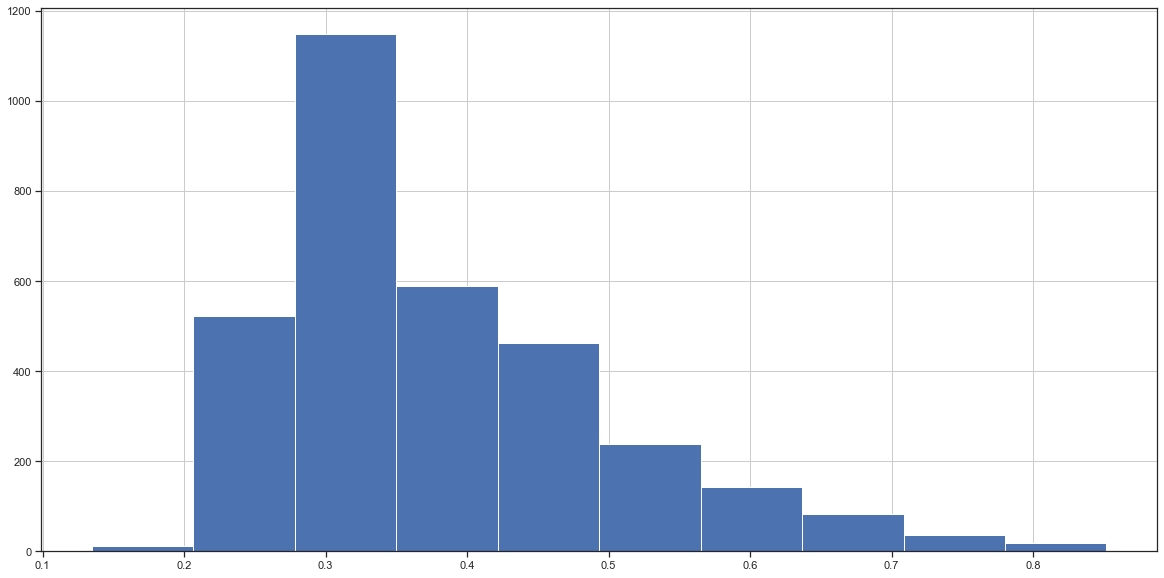

In [100]:
sensor_data.apply(np.mean, axis=1).hist()

<AxesSubplot:xlabel='field_id', ylabel='mean_sensor'>

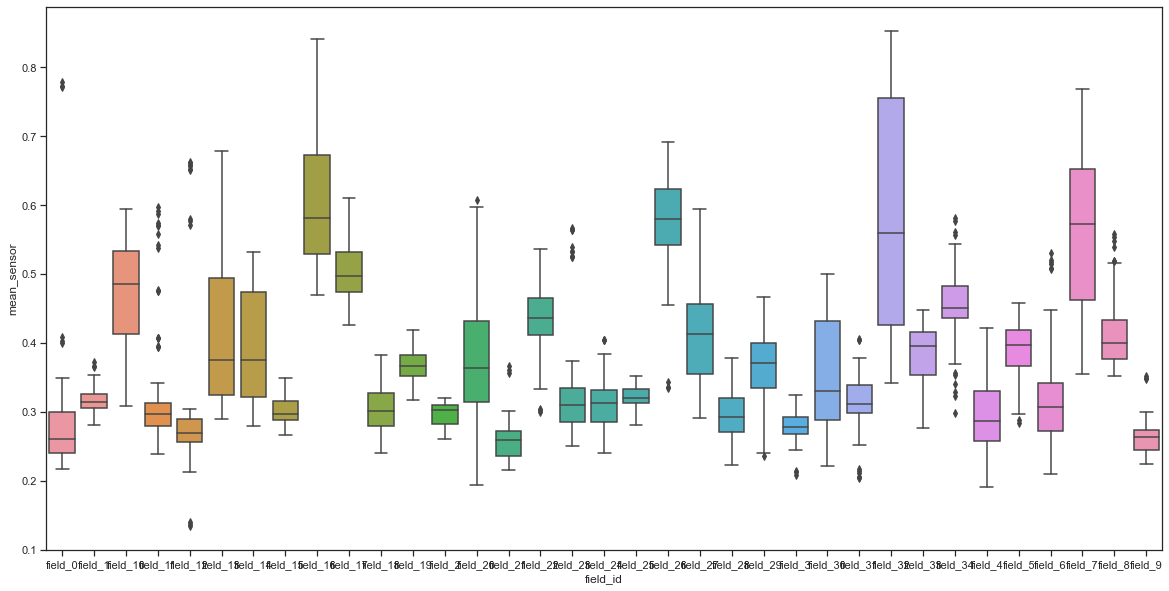

In [107]:
mean_df = pd.DataFrame(sensor_data.apply(np.mean, axis=1))
mean_df.columns = ['mean_sensor']
mean_df = pd.concat([mean_df, misc_data], axis=1)
sns.boxplot(x="field_id", y="mean_sensor", data=mean_df)

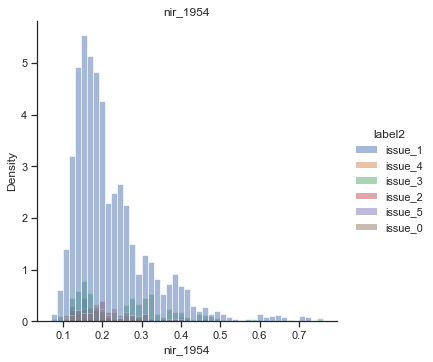

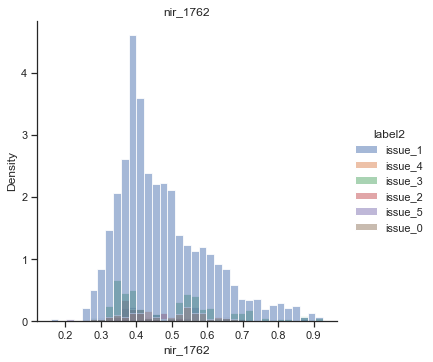

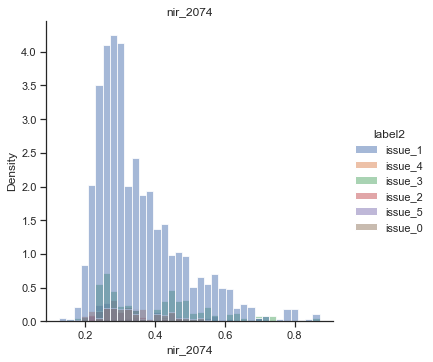

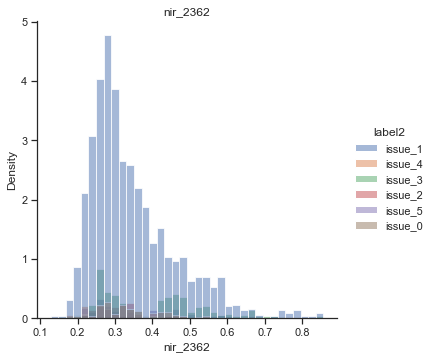

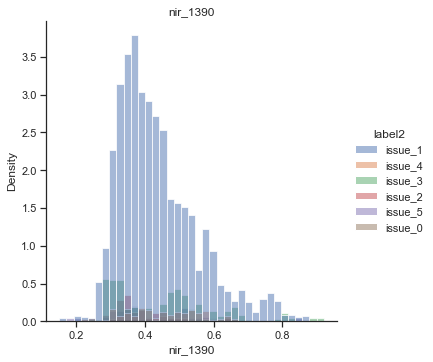

In [293]:
 for col in np.random.choice([c for c in sensor_data], size=5):
    sns.displot(raw_data, x=col, hue='label2', kind="hist", stat='density')
    plt.title(col)

In [159]:
sensor_cols = [c for c in raw_data if 'nir' in c]
raw_data.groupby('position_id').apply(lambda group: group[sensor_cols])

,nir_1366,nir_1378,nir_1390,nir_1402,nir_1414,nir_1426,nir_1438,nir_1450,nir_1462,nir_1474,...,nir_2422,nir_2434,nir_2446,nir_2458,nir_2470,nir_2482,nir_2494,nir_2506,nir_2518,nir_2530
0,0.363926,0.350865,0.330383,0.297856,0.274306,0.267428,0.263071,0.262623,0.260094,0.264123,...,0.193001,0.185857,0.178881,0.172339,0.166322,0.160945,0.156600,0.153578,0.151945,0.151691
1,0.352420,0.341933,0.320079,0.289949,0.261719,0.256643,0.253282,0.252888,0.250116,0.255253,...,0.186710,0.179734,0.172948,0.166441,0.160301,0.154674,0.150122,0.147022,0.145378,0.145107
2,0.352814,0.345784,0.322058,0.291212,0.264951,0.256647,0.254134,0.252345,0.252983,0.256853,...,0.186841,0.179803,0.172863,0.166126,0.159692,0.153734,0.148943,0.145764,0.144151,0.143970
3,0.382781,0.371203,0.356452,0.330397,0.306710,0.308089,0.306187,0.305090,0.303479,0.308517,...,0.238716,0.232130,0.225462,0.219039,0.213180,0.208198,0.204358,0.201787,0.200565,0.200643
4,0.372411,0.366229,0.347437,0.322621,0.299037,0.298630,0.293724,0.296257,0.295536,0.297862,...,0.225614,0.218853,0.212226,0.205840,0.199747,0.194242,0.189978,0.187191,0.185979,0.186190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3250,0.301062,0.293369,0.279389,0.256279,0.238852,0.235883,0.230162,0.231443,0.230023,0.234952,...,0.160911,0.154864,0.148960,0.143863,0.139233,0.134613,0.130439,0.127515,0.126104,0.126287
3251,0.303580,0.298744,0.278609,0.257809,0.237712,0.235676,0.231857,0.232086,0.230371,0.237140,...,0.159848,0.153597,0.147483,0.142336,0.137772,0.133246,0.129117,0.126148,0.124624,0.124653
3252,0.507623,0.497783,0.472670,0.441210,0.412309,0.406993,0.401772,0.399799,0.399775,0.405411,...,0.282782,0.272717,0.263980,0.256834,0.250282,0.243667,0.237523,0.233050,0.231598,0.232609
3253,0.497532,0.488623,0.465486,0.428848,0.402555,0.396157,0.393476,0.389368,0.392493,0.396045,...,0.274175,0.264068,0.255137,0.247692,0.240904,0.234215,0.228053,0.223544,0.221991,0.222915


In [165]:
raw_data[raw_data.position_id == 1][sensor_cols].mean().mean()

0.400872764724677

In [175]:
raw_data[(raw_data.position_id == 1) & (raw_data.spot_id == 1) & (raw_data.field_id == 'field_6')]

,nir_1366,nir_1378,nir_1390,nir_1402,nir_1414,nir_1426,nir_1438,nir_1450,nir_1462,nir_1474,...,nir_2518,nir_2530,device_id,label1,label2,field_id,position_id,spot_id,mID,date
0,0.363926,0.350865,0.330383,0.297856,0.274306,0.267428,0.263071,0.262623,0.260094,0.264123,...,0.151945,0.151691,6,good,issue_1,field_6,1,1,514234,2020-03-04
1,0.352420,0.341933,0.320079,0.289949,0.261719,0.256643,0.253282,0.252888,0.250116,0.255253,...,0.145378,0.145107,6,good,issue_1,field_6,1,1,514236,2020-03-04
2,0.352814,0.345784,0.322058,0.291212,0.264951,0.256647,0.254134,0.252345,0.252983,0.256853,...,0.144151,0.143970,6,good,issue_1,field_6,1,1,514238,2020-03-04
18,0.449537,0.443381,0.420892,0.386956,0.355467,0.350590,0.350423,0.350668,0.350119,0.356643,...,0.217616,0.218372,5,bad,issue_4,field_6,1,1,514475,2020-03-04
19,0.442708,0.432522,0.409139,0.375875,0.345987,0.344995,0.340831,0.338098,0.339654,0.346517,...,0.210935,0.211588,5,bad,issue_4,field_6,1,1,514477,2020-03-04
20,0.437691,0.428583,0.408203,0.374218,0.343579,0.339656,0.335308,0.338418,0.336476,0.343388,...,0.209626,0.210330,5,bad,issue_4,field_6,1,1,514480,2020-03-04


In [223]:
melted = raw_data.melt(misc_cols, sensor_cols, value_name='measurement', var_name='wavelength') 
melted['location'] = melted.apply(lambda row: f'{row.field_id}, {row.position_id}, {row.spot_id}', axis=1)

In [257]:
melted.head(n=100)

,device_id,label1,label2,field_id,position_id,spot_id,mID,date,wavelength,measurement,location
0,6,good,issue_1,field_6,1,1,514234,2020-03-04,nir_1366,0.363926,"field_6, 1, 1"
1,6,good,issue_1,field_6,1,1,514236,2020-03-04,nir_1366,0.352420,"field_6, 1, 1"
2,6,good,issue_1,field_6,1,1,514238,2020-03-04,nir_1366,0.352814,"field_6, 1, 1"
3,5,bad,issue_4,field_6,2,1,514248,2020-03-04,nir_1366,0.382781,"field_6, 2, 1"
4,5,bad,issue_4,field_6,2,1,514251,2020-03-04,nir_1366,0.372411,"field_6, 2, 1"
...,...,...,...,...,...,...,...,...,...,...,...
95,8,bad,issue_4,field_0,2,1,7,2020-03-15,nir_1366,0.359872,"field_0, 2, 1"
96,1,good,issue_1,field_0,1,2,29,2020-03-15,nir_1366,0.344156,"field_0, 1, 2"
97,1,good,issue_1,field_0,1,2,32,2020-03-15,nir_1366,0.342707,"field_0, 1, 2"
98,1,good,issue_1,field_0,1,2,34,2020-03-15,nir_1366,0.341854,"field_0, 1, 2"


In [344]:
locations = melted[melted.label1 == 'bad'][['field_id', 'position_id', 'spot_id']].drop_duplicates()
locations

,field_id,position_id,spot_id
3,field_6,2,1
6,field_6,1,2
15,field_6,1,3
18,field_6,1,1
55,field_6,4,1
...,...,...,...
3076,field_3,1,2
3110,field_3,1,3
3122,field_3,5,1
3153,field_3,3,2


In [ ]:
raw_data.merge()

<AxesSubplot:xlabel='date', ylabel='measurement'>

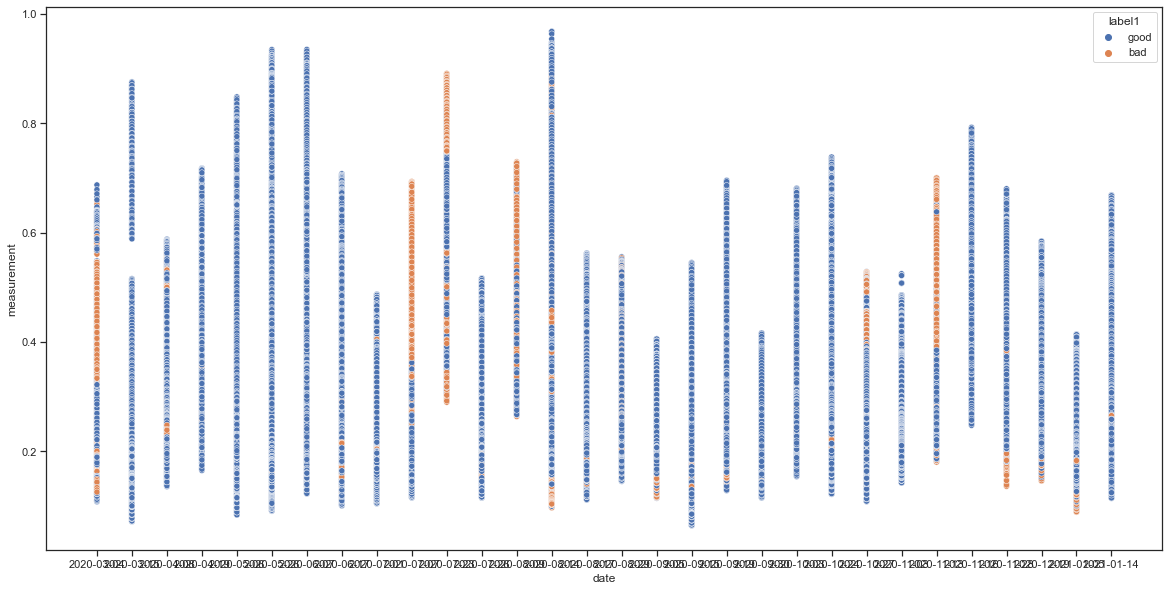

In [378]:
sns.scatterplot(data=melted, 
                x='date', 
                y='measurement', 
                hue='label1')

<AxesSubplot:>

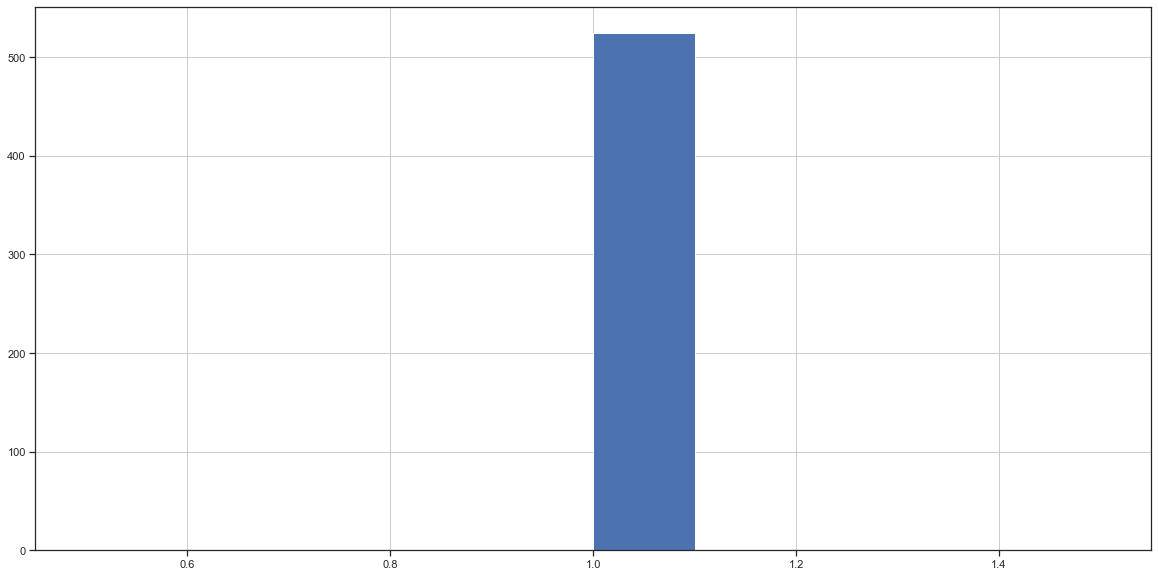

In [379]:
date_counts = melted.groupby('location').date.nunique()
date_counts.hist()

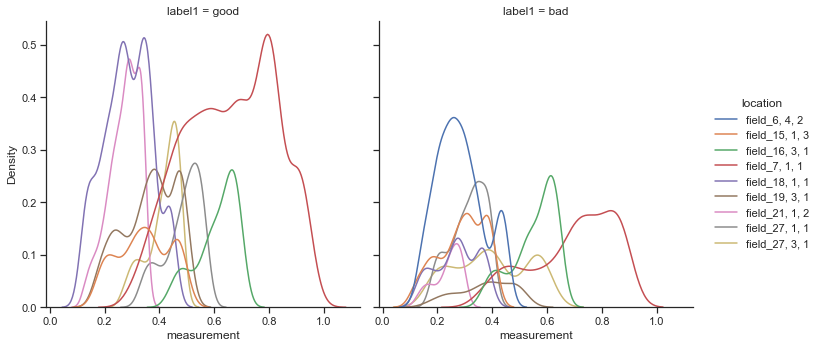

In [342]:
locations = melted[melted.label1 == 'bad'].location.unique()
locations = np.random.choice(list(locations), size=10)
sns.displot(melted[melted.location.isin(locations)], 
            x='measurement', 
            hue='location', 
            col='label1', 
            kind='kde', 
            col_order=['good', 'bad'])

In [ ]:
for col in locations:
    sns.displot(melted, x='measurement', hue='label1', kind="kde")
    plt.title(col)

In [246]:
len(misc_data[misc_data['label1'] == 'bad'])

322

In [247]:
len(misc_data[misc_data['label1'] == 'good'])

2911

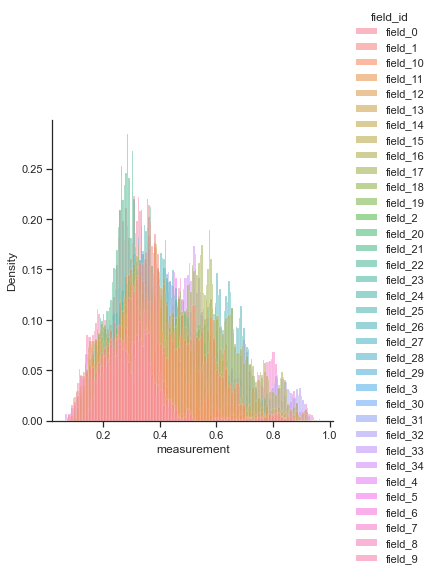

In [263]:
sns.displot(melted, x="measurement", hue="field_id",stat="density")

## Modeling

In [381]:
import sklearn

In [449]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report

In [440]:
melted = raw_data.melt(misc_cols, sensor_cols, value_name='measurement', var_name='wavelength') 
melted['location'] = melted.apply(lambda row: f'{row.field_id}, {row.position_id}, {row.spot_id}', axis=1)

In [441]:
bad_locations = melted[melted.label1 == 'bad'].location.unique()
melted[melted.location.isin(bad_locations)].label1.value_counts()

good    44394
bad     31556
Name: label1, dtype: int64

In [443]:
melted = melted[melted.location.isin(bad_locations)].dropna()
melted.head()

,device_id,label1,label2,field_id,position_id,spot_id,mID,date,wavelength,measurement,location
0,6,good,issue_1,field_6,1,1,514234,2020-03-04,nir_1366,0.363926,"field_6, 1, 1"
1,6,good,issue_1,field_6,1,1,514236,2020-03-04,nir_1366,0.352420,"field_6, 1, 1"
2,6,good,issue_1,field_6,1,1,514238,2020-03-04,nir_1366,0.352814,"field_6, 1, 1"
3,5,bad,issue_4,field_6,2,1,514248,2020-03-04,nir_1366,0.382781,"field_6, 2, 1"
4,5,bad,issue_4,field_6,2,1,514251,2020-03-04,nir_1366,0.372411,"field_6, 2, 1"


In [444]:
melted = pd.get_dummies(melted, prefix='location', columns=['location'])

In [467]:
target = ['label1']
features = ['measurement'] + [col for col in melted if 'location_' in col]

X, y = melted[features].to_numpy(), melted[target].to_numpy().ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [468]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=5, random_state=0).fit(X_train, y_train)

In [469]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         bad       0.75      0.65      0.70     10416
        good       0.77      0.85      0.81     14647

    accuracy                           0.77     25063
   macro avg       0.76      0.75      0.76     25063
weighted avg       0.77      0.77      0.76     25063



In [471]:
melted

,device_id,label1,label2,field_id,position_id,spot_id,mID,date,wavelength,measurement,...,"location_field_7, 3, 1","location_field_7, 3, 2","location_field_8, 1, 1","location_field_8, 2, 3","location_field_8, 4, 3","location_field_9, 2, 1","location_field_9, 3, 1","location_field_9, 3, 3","location_field_9, 4, 3","location_field_9, 5, 1"
0,6,good,issue_1,field_6,1,1,514234,2020-03-04,nir_1366,0.363926,...,0,0,0,0,0,0,0,0,0,0
1,6,good,issue_1,field_6,1,1,514236,2020-03-04,nir_1366,0.352420,...,0,0,0,0,0,0,0,0,0,0
2,6,good,issue_1,field_6,1,1,514238,2020-03-04,nir_1366,0.352814,...,0,0,0,0,0,0,0,0,0,0
3,5,bad,issue_4,field_6,2,1,514248,2020-03-04,nir_1366,0.382781,...,0,0,0,0,0,0,0,0,0,0
4,5,bad,issue_4,field_6,2,1,514251,2020-03-04,nir_1366,0.372411,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318959,8,bad,issue_4,field_30,4,2,666463,2021-01-14,nir_2530,0.248081,...,0,0,0,0,0,0,0,0,0,0
318960,8,bad,issue_4,field_30,4,2,666465,2021-01-14,nir_2530,0.245852,...,0,0,0,0,0,0,0,0,0,0
318978,10,good,issue_1,field_30,4,2,666605,2021-01-14,nir_2530,0.168352,...,0,0,0,0,0,0,0,0,0,0
318979,10,good,issue_1,field_30,4,2,666608,2021-01-14,nir_2530,0.164889,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='measurement', ylabel='Count'>

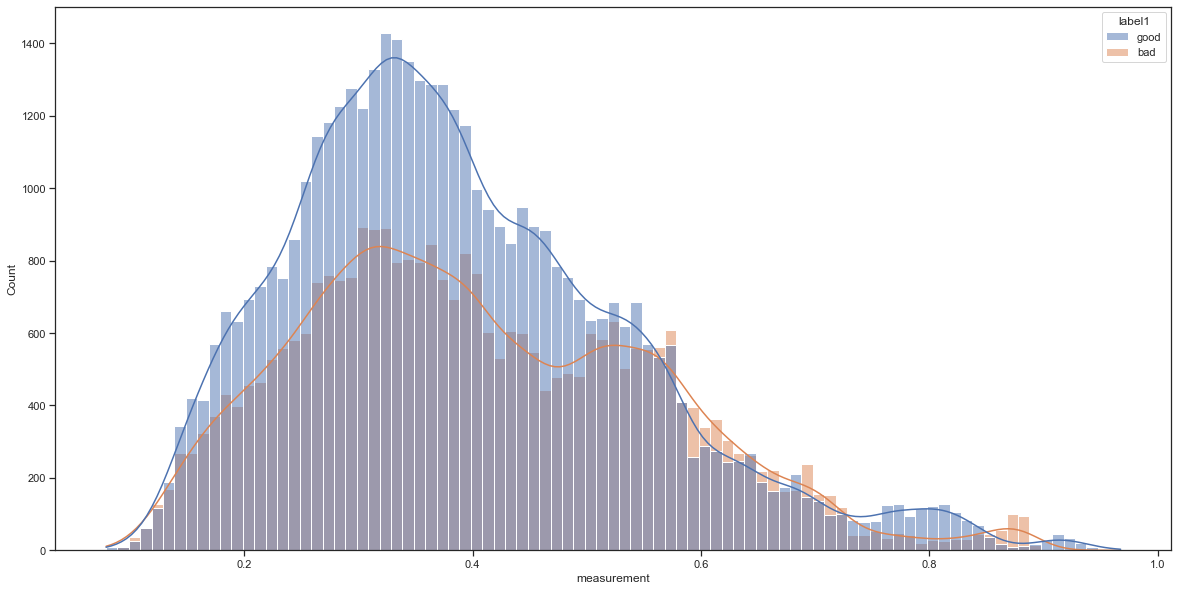

In [473]:
sns.histplot(melted, x='measurement', hue='label1', kde=True)


<AxesSubplot:xlabel='measurement', ylabel='Count'>

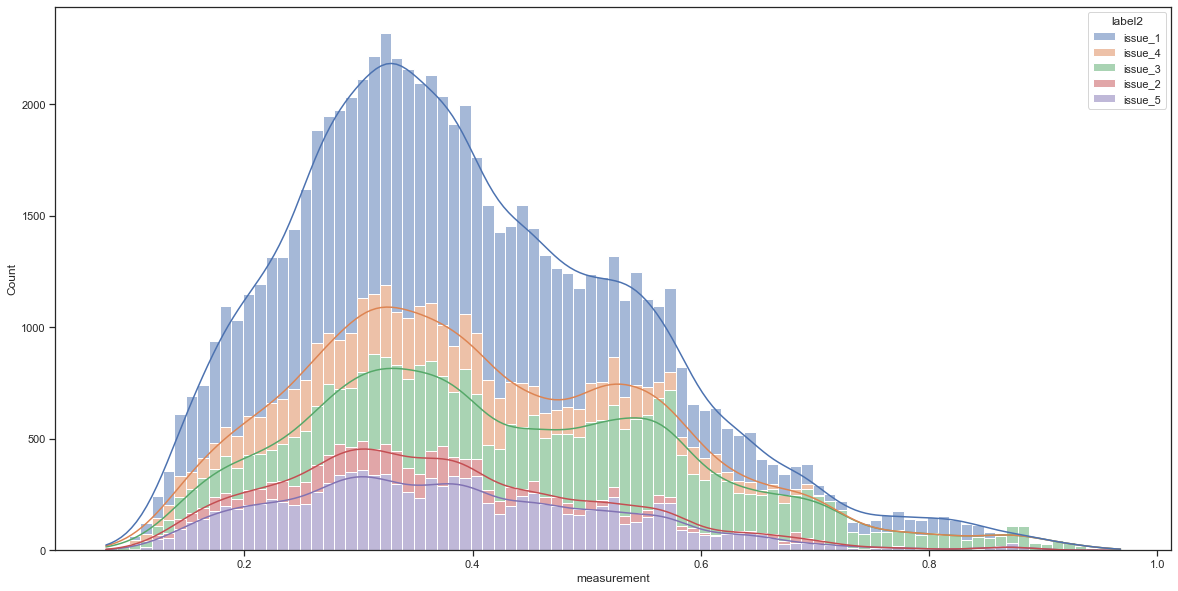

In [476]:
sns.histplot(melted, x='measurement', hue='label2', multiple="stack", kde=True)
